## Analisi delle simulazioni

In [12]:
import numpy as np
from scipy.io import savemat
import matplotlib.pyplot as plt
from analisirisultati import *

Tempo totale: 1798
Dimensioni della griglia: 200 Lx 100 Ly
Densità totale particelle 5.0


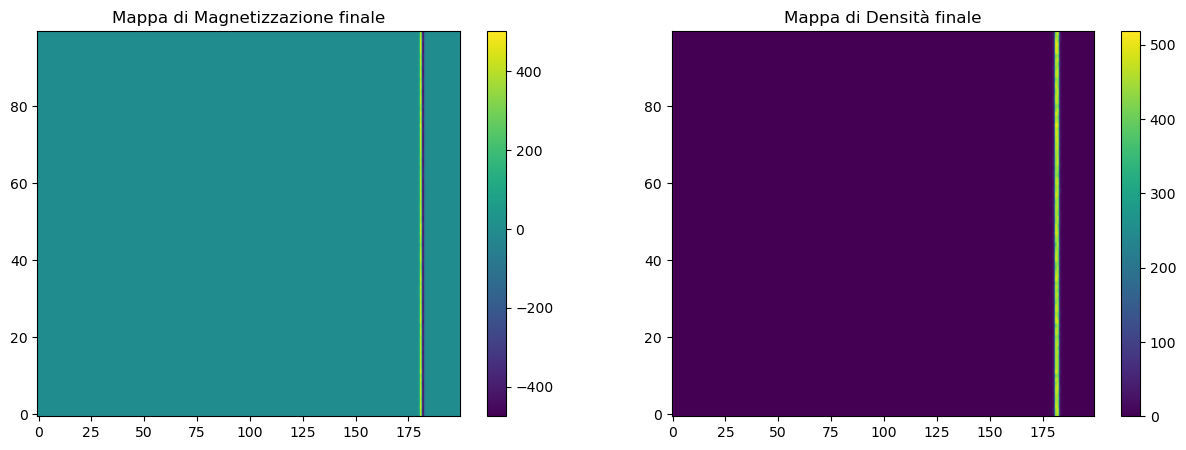

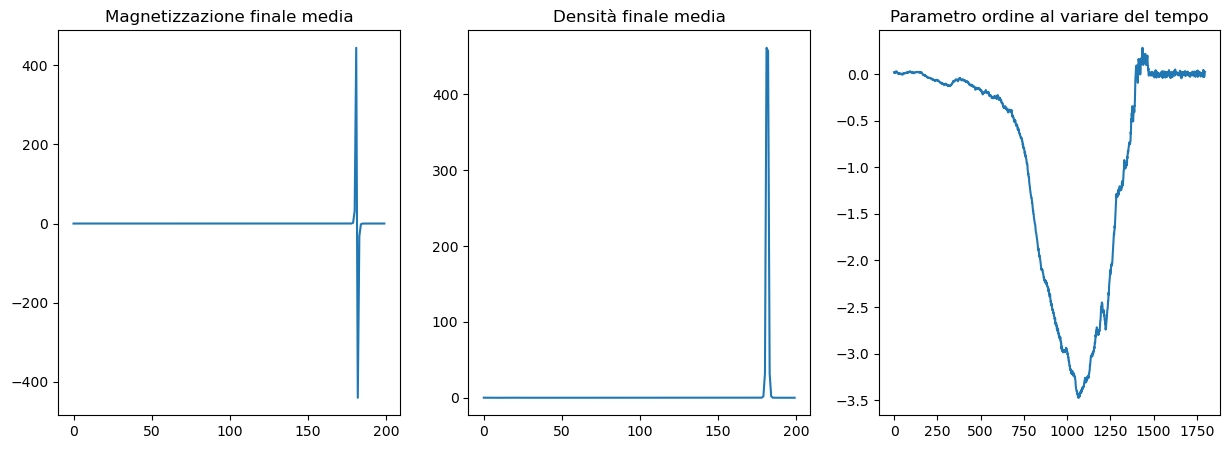

In [13]:
from scipy.io import loadmat # type: ignore

percorso = '/Users/annat/Dati/codici da far girare/T0.200gamma0.02frames_m.mat'
percorso2 = '/Users/annat/Dati/codici da far girare/T0.200gamma0.02frames_d.mat'

dati = loadmat(percorso)
dati2 = loadmat(percorso2)

T = 0.2
D = 1
gamma = 0.02
metodo_calcolo = 3
frames = 2_500

magnet = dati['frames_m']
magnet = np.array(magnet, dtype=np.float64)

density = dati2['frames_d']
density = np.array(density, dtype=np.float64)

magnet_finale = magnet[-1, :, :]
magnet_finale =  np.squeeze(magnet_finale)

density_finale = density[-1, :, :]
density_finale =  np.squeeze(density_finale)

tempo = np.shape(magnet)[0]
Lx = np.shape(magnet)[2]
Ly = np.shape(magnet)[1]
densità_particelle = np.sum(density_finale)/(Lx*Ly)
print('Tempo totale:', tempo)
print('Dimensioni della griglia:', Lx, 'Lx', Ly, 'Ly')
print('Densità totale particelle', densità_particelle)


plot_finali(magnet, density, tempo, Lx, Ly)

Soglia magnetizzazione (solo t=0): 11.896370314107402
Soglia magnetizzazione (media prime 50): 16.90661828747199
Soglia densità (solo t=0): 16.178327245165082
Soglia densità (media prime 50): 14.415174878885681


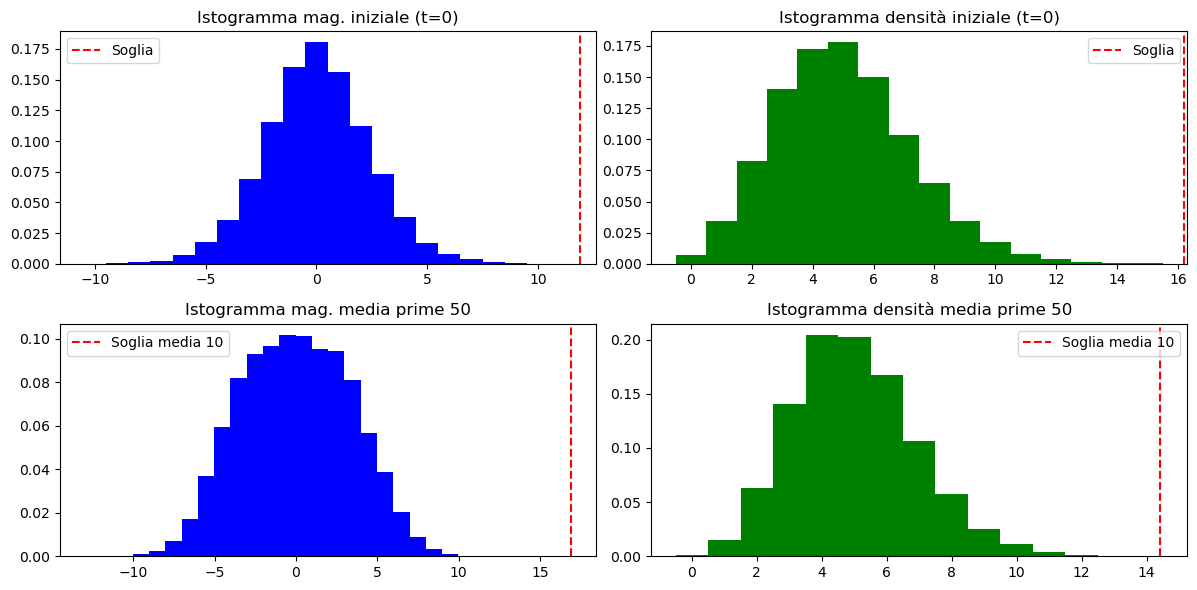

In [14]:
soglia = istogrammi_soglia(magnet, density, prime_immagini=50)

# Asters

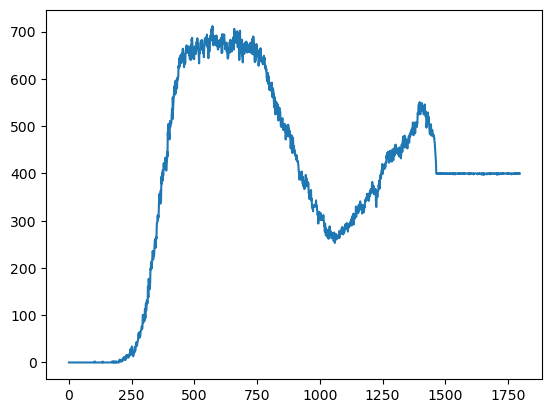

In [15]:
evoluzione_dentro(magnet, soglia, tempo)

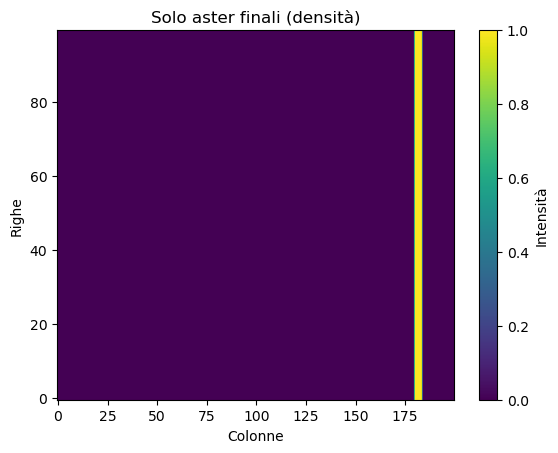

In [16]:
asters = heatmap_aster(density_finale, soglia)

plt.imshow(asters, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Intensità')  # aggiunge barra dei colori
plt.title('Solo aster finali (densità)')
plt.xlabel('Colonne')
plt.ylabel('Righe')
plt.show()

(100, 200)
Numero di cluster: 1


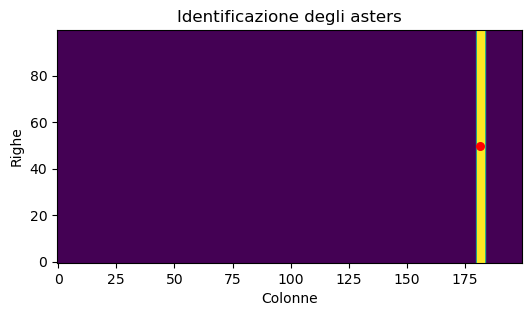

In [17]:
asters = heatmap_aster(np.squeeze(magnet[-1,:,:]), soglia)

print(asters.shape)

caratteristiche_cluster = caratterizzazione_aster(magnet_finale, soglia)
areas = caratteristiche_cluster[0]
centroids = caratteristiche_cluster[1]
num = areas.__len__()
print('Numero di cluster:', num)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(asters, cmap='viridis', origin='lower')
ax.set_title("Identificazione degli asters")
ax.set_xlabel("Colonne")
ax.set_ylabel("Righe")

# Disegno ogni centroide e un segmento che indica l'orientazione
for (cy, cx) in centroids:
    ax.scatter(cx, cy, c='red', s=30)

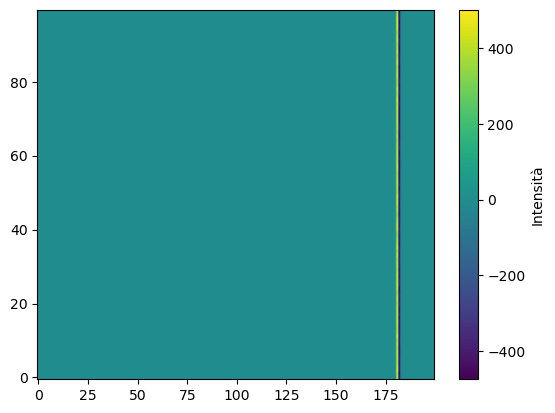

In [18]:
aster_finali_m = magnet_finale * asters
aster_finali_d = density_finale * asters

plt.imshow(aster_finali_m, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Intensità')  # aggiunge barra dei colori
plt.show()

In [19]:
rate = print_probabilities(magnet_finale, density_finale, soglia, T, gamma, D, metodo_calcolo)
#print(rate)

Probabilità(+ --> -) in siti con magnetizzazione negativa: 77.79% +/- 0.91%
Probabilità(+ --> -) in siti con magnetizzazione positiva: 0.0056% +/- 0.000067%
Probabilità(- --> +) in siti con magnetizzazione negativa: 0.0057% +/- 0.000066%
Probabilità(- --> +) in siti con magnetizzazione positiva: 78.88% +/- 0.94%


In [20]:
t = tempo_un_aster(magnet, soglia, t0= 100)

In [21]:
tempo_fisico(t,1_000_000,frames, T, D)

1434.5349265600503